In [178]:
import cortex
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import pathlib
import pickle
from collections import defaultdict

In [179]:
cur_path = pathlib.Path.cwd()

In [180]:
cur_path

PosixPath('/Users/hq/code/neural_computation/nc_project')

In [181]:
data_path = cur_path / "data" / "ResultsSubj1Correlation"
# first, let's try all layers for each ROI
d_all_layer = defaultdict(list)
sides = ["LH", "RH"]
ROI = ["OPA", "PPA", "LOC", "EarlyVis", "RSC"]
AUGMENTATIONS = ["ReducedImageNetFeatures",
                    "ReducedImageNetFeaturesFlipHorizontal",
                    "ReducedImageNetFeaturesFlipVertical",
                    "ReducedImageNetFeaturesGaussianBlur",
                    "ReducedImageNetFeaturesGaussianNoise",
                    "ReducedImageNetFeaturesRandomCrop"]

In [182]:
for layer in [2,5,7,9, 12]:
    for augment in AUGMENTATIONS:
        with open(data_path / "sub1_layer{}_augment_{}".format(layer, augment)/"correlations.pk", "rb") as f:
            single_experiment = pickle.load(f)
            for side in sides:
                for roi in ROI:
                    d_all_layer[augment].append(np.array(single_experiment[side+roi])[:, 0])
            

In [183]:
for key in d_all_layer.keys():
    d_all_layer[key] = np.hstack(d_all_layer[key])

In [184]:
d_all_layer["ReducedImageNetFeatures"].shape

(8425,)

In [185]:
# second, let's try choosing the best layer for each ROI
d_best_layer = defaultdict(list)

In [186]:
helper = defaultdict(list)
for layer in [2,5,7,9, 12]:
    for augment in AUGMENTATIONS:
        with open(data_path / "sub1_layer{}_augment_{}".format(layer, augment)/"correlations.pk", "rb") as f:
            single_experiment = pickle.load(f)
            for side in sides:
                for roi in ROI:
                    helper[augment+"_"+roi].append(np.array(single_experiment[side+roi])[:,0])
            

In [187]:
for key in helper.keys():
    helper[key] = sorted(helper[key], key=lambda k: -np.mean(k))

In [188]:
for augment in AUGMENTATIONS:
    for roi in ROI:
        d_best_layer[augment].append(helper[augment+"_"+roi][0])

In [189]:
for key in d_best_layer.keys():
    d_best_layer[key] = np.hstack(d_best_layer[key])

In [190]:
# third, use a summary number for each (ROI, layer) pair
d_mean_summary = defaultdict(list)

In [191]:
for layer in [2,5,7,9, 12]:
    for augment in AUGMENTATIONS:
        with open(data_path / "sub1_layer{}_augment_{}".format(layer, augment)/"correlations.pk", "rb") as f:
            single_experiment = pickle.load(f)
            for side in sides:
                for roi in ROI:
                    d_mean_summary[augment].append(np.mean(np.array(single_experiment[side+roi])[:, 0]))
            

In [192]:
for key in d_mean_summary.keys():
    d_mean_summary[key] = np.array(d_mean_summary[key])

In [193]:
d_mean_summary["ReducedImageNetFeatures"].shape

(50,)

In [194]:
def run_hierarchy(d, linkage="average", suffix=""):
    """
    Adapted from https://github.com/ariaaay/NeuralTaskonomy
    """
    mat = []
    labels = []
    for key in d:
        mat.append(d[key])
        labels.append(key[15:])
    mat = np.vstack(mat)
    print(labels)
    Z = hierarchy.linkage(mat, linkage)
    plt.figure(figsize=(12,4))
    ax = plt.subplot(1,1,1)
    dn = hierarchy.dendrogram(Z, ax=ax, labels=labels, leaf_font_size=15, color_threshold=0, above_threshold_color='gray')
    plt.xticks(rotation="vertical")
    color_list = ["grey"] * 6
    [t.set_color(i) for (i, t) in zip(color_list, ax.xaxis.get_ticklabels())]
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.subplots_adjust(bottom=0.5)
    plt.savefig(data_path/"dendrogram_{}.pdf".format(suffix))

['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']


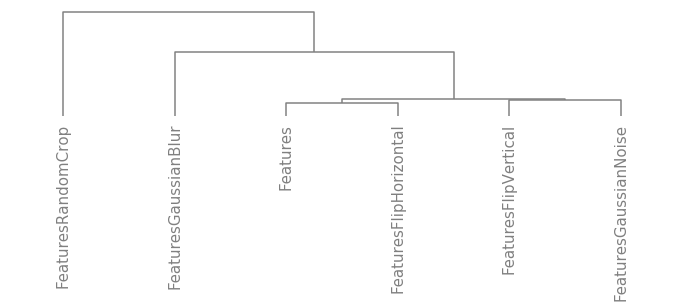

In [195]:
run_hierarchy(d_mean_summary, suffix="all_ROIs_mean_summary")

['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']


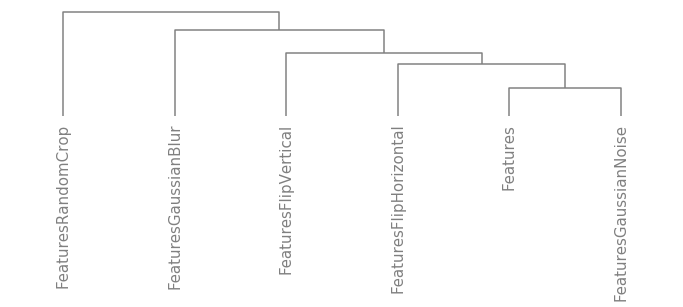

In [196]:
run_hierarchy(d_best_layer, suffix="all_ROIs_best_layer")

['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']


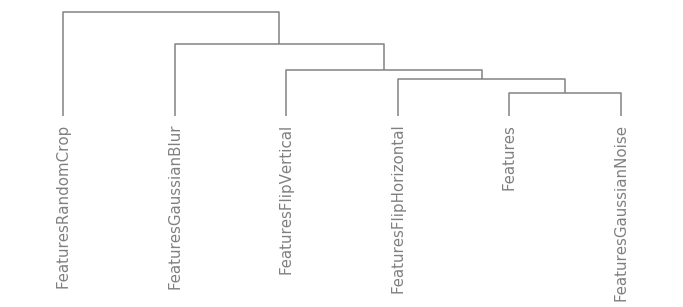

In [197]:
run_hierarchy(d_all_layer, suffix="all_ROIs_all_layer")

In [198]:
# per ROI version
def all_layer_hierarchy_cluster_per_ROI(roi, augments=AUGMENTATIONS):
    d_all_layers_helper = defaultdict(list)
    for layer in [2,5,7,9,12]:
        for augment in AUGMENTATIONS:
            with open(data_path / "sub1_layer{}_augment_{}".format(layer, augment)/"correlations.pk", "rb") as f:
                single_experiment = pickle.load(f)
                for side in sides:
                    d_all_layers_helper[augment].append(np.array(single_experiment[side+roi])[:, 0])
    for key in d_all_layer.keys():
        d_all_layers_helper[key] = np.hstack(d_all_layers_helper[key])
        print(d_all_layers_helper[key].shape)
    run_hierarchy(d_all_layers_helper, suffix=roi+"_all_layer")

(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(1655,)
(1655,)
(1655,)
(1655,)
(1655,)
(1655,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(1710,)
(1710,)
(1710,)
(1710,)
(1710,)
(1710,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(2475,)
(2475,)
(2475,)
(2475,)
(2475,)
(2475,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(1145,)
(1145,)
(1145,)
(1145,)
(1145,)
(1145,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']


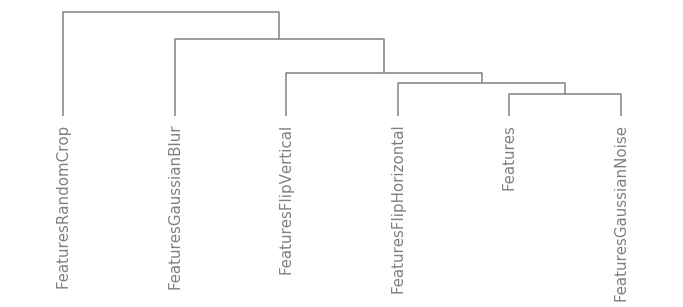

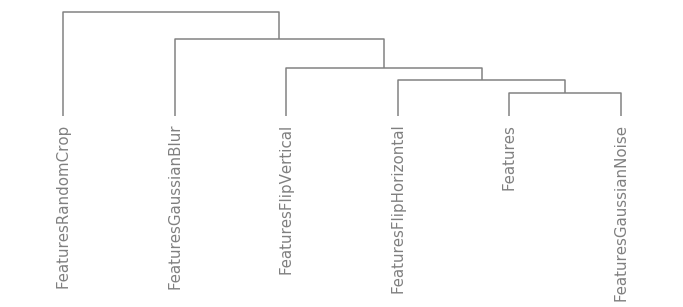

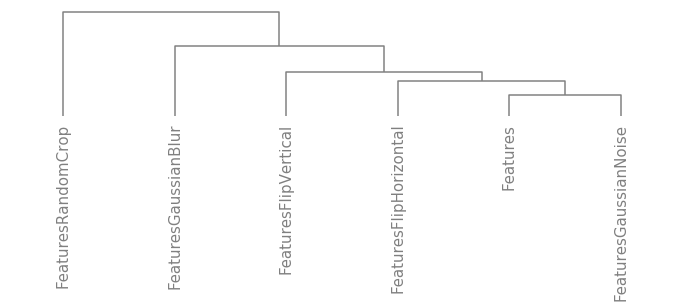

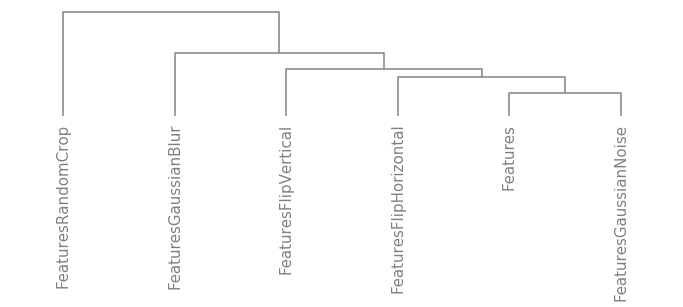

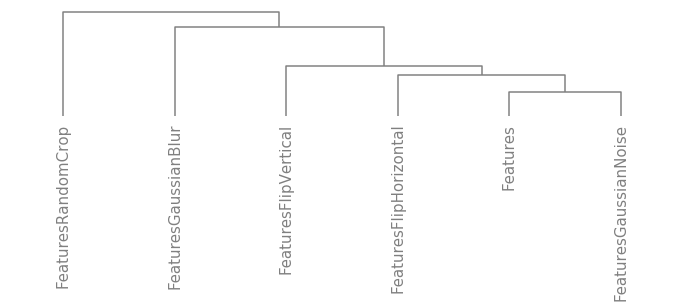

In [200]:
for roi in ROI:
    all_layer_hierarchy_cluster_per_ROI(roi)

In [201]:
def best_layer_hierarchy_cluster_per_ROI(roi, augments=AUGMENTATIONS):
    d_best_layers_helper = defaultdict(list)
    d_intermediate_helper = defaultdict(list)
    for layer in [2,5,7,9,12]:
        for augment in AUGMENTATIONS:
            with open(data_path / "sub1_layer{}_augment_{}".format(layer, augment)/"correlations.pk", "rb") as f:
                single_experiment = pickle.load(f)
                for side in sides:
                    d_intermediate_helper[augment+"_"+roi].append(np.array(single_experiment[side+roi])[:,0])
    for key in d_intermediate_helper.keys():
        d_intermediate_helper[key] = sorted(d_intermediate_helper[key], key=lambda k: -np.mean(k))
    for augment in AUGMENTATIONS:
        d_best_layers_helper[augment].append(d_intermediate_helper[augment+"_"+roi][0])
    for key in d_best_layers_helper.keys():
        d_best_layers_helper[key] = np.hstack(d_best_layers_helper[key])
        print(d_best_layers_helper[key].shape)
    run_hierarchy(d_best_layers_helper, suffix=roi+"_best_layer")

(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(190,)
(190,)
(190,)
(190,)
(190,)
(190,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(210,)
(210,)
(210,)
(210,)
(210,)
(210,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']
(143,)
(143,)
(143,)
(143,)
(143,)
(143,)
['Features', 'FeaturesFlipHorizontal', 'FeaturesFlipVertical', 'FeaturesGaussianBlur', 'FeaturesGaussianNoise', 'FeaturesRandomCrop']


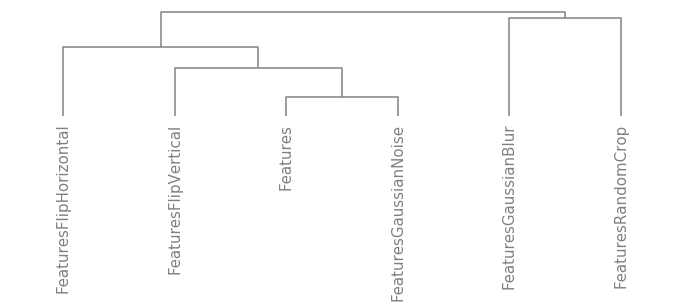

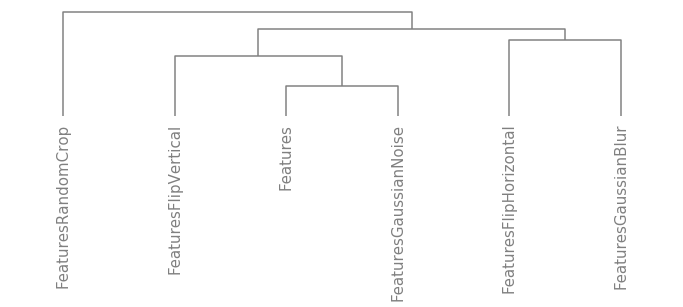

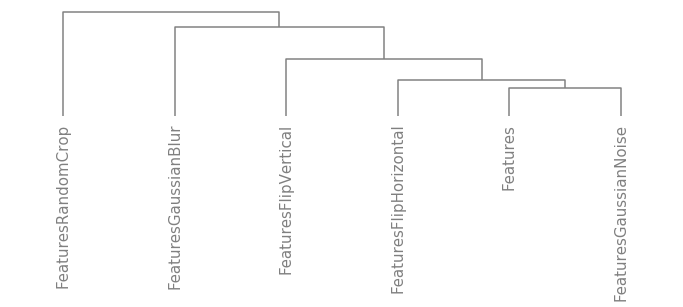

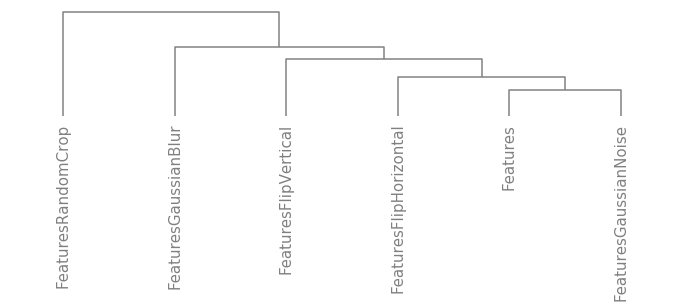

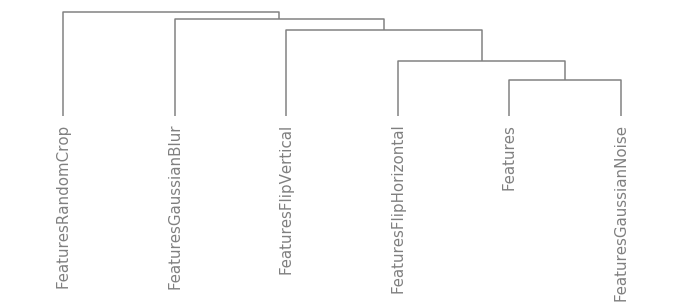

In [202]:
for roi in ROI:
    best_layer_hierarchy_cluster_per_ROI(roi)